In [61]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
import os
import numpy as np
from PIL import Image, ImageFilter
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [62]:
#load datas
X=[]
Y=[]
elements= [x for x in os.listdir() if x not in ["test", "index.ipynb"]]
for folder in elements:
    content= os.listdir(folder)
    for im in content:
        img = Image.open(folder+"/"+im).resize((215, 215))
        X.append(np.array(img)/255)
        Y.append(folder)
        #blur image and add
        #imgblur = img.filter(ImageFilter.BLUR)
        #X.append(np.array(imgblur)/255)
        #Y.append(folder)
        #rotate image before adding
        #for i in range(10, 300, 10):
            #rot_img= img.rotate(i)
            #X.append(np.array(rot_img)/255)
            #Y.append(folder)
        #transpose image and add
        #for i in range(0, 7):
            #trans_img = img.transpose(i)
            #X.append(np.array(trans_img)/255)
            #Y.append(folder)
X=np.array(X)
Y=np.array(Y)

In [63]:
#load model
model= Sequential()
model.add(Conv2D(16, (3,3), input_shape=(215,215, 3), activation="relu", padding="same"))
model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [64]:
LE= LabelEncoder()
Y_enc= LE.fit_transform(Y)

In [65]:
history = model.fit(X, Y_enc, epochs=7)

Epoch 1/7
3/3 [==============================] - 5s 1s/step - loss: 2.1720 - sparse_categorical_accuracy: 0.2917
Epoch 2/7
3/3 [==============================] - 4s 941ms/step - loss: 2.4146 - sparse_categorical_accuracy: 0.2778
Epoch 3/7
3/3 [==============================] - 4s 1000ms/step - loss: 1.5010 - sparse_categorical_accuracy: 0.2917
Epoch 4/7
3/3 [==============================] - 4s 1s/step - loss: 0.8123 - sparse_categorical_accuracy: 0.5694
Epoch 5/7
3/3 [==============================] - 4s 995ms/step - loss: 0.7887 - sparse_categorical_accuracy: 0.7361
Epoch 6/7
3/3 [==============================] - 3s 933ms/step - loss: 0.6903 - sparse_categorical_accuracy: 0.8333
Epoch 7/7
3/3 [==============================] - 3s 959ms/step - loss: 0.5170 - sparse_categorical_accuracy: 0.9306


In [72]:
def prediction(image):
    img= Image.open("test/"+image).resize((215,215))
    test= np.reshape(np.array(img), (1,215,215,3))
    pred= model.predict(test)
    pred= list(pred)[0]
    arg= list(np.argsort(pred))[::-1]
    plt.imshow(img)
    plt.show()
    for i in arg:
        act=LE.inverse_transform([i])[0]
        print("l'image est proche de "+act+" de "+str(pred[i]))

1/1 [==============================] - 0s 80ms/step


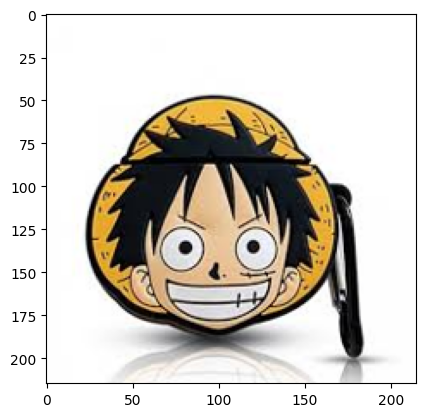

l'image est proche de luffy de 1.0
l'image est proche de yamamoto de 0.0
l'image est proche de asta de 0.0


In [73]:
prediction("luff4.jpg")

1/1 [==============================] - 0s 61ms/step


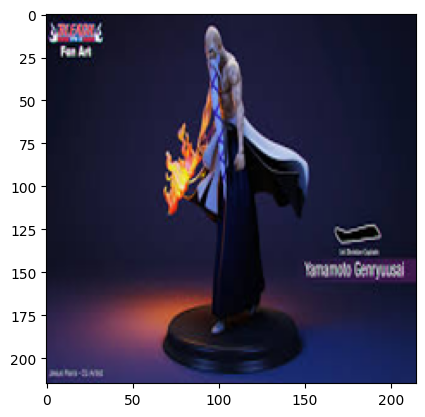

l'image est proche de yamamoto de 1.0
l'image est proche de luffy de 0.0
l'image est proche de asta de 0.0


In [74]:
prediction("yaaam.jpg")

1/1 [==============================] - 0s 72ms/step


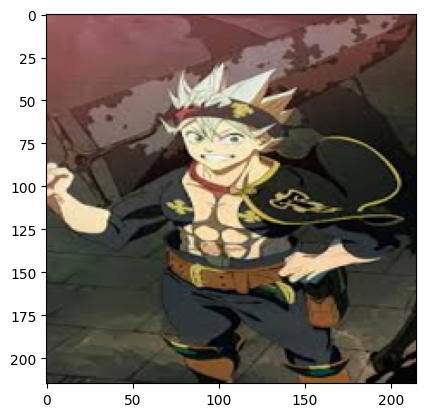

l'image est proche de asta de 1.0
l'image est proche de yamamoto de 0.0
l'image est proche de luffy de 0.0


In [75]:
prediction("aastaa.jpg")

1/1 [==============================] - 0s 72ms/step


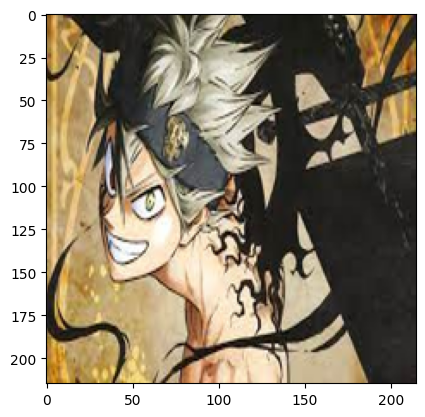

l'image est proche de asta de 1.0
l'image est proche de yamamoto de 5.5142275e-17
l'image est proche de luffy de 9.960178e-31


In [76]:
prediction("asst.jpg")